In [63]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.cluster import KMeans
#%matplotlib notebook
plt.style.use('seaborn')

def convert(image_bgr, encoding:str):
    return cv2.cvtColor(image_bgr, getattr(cv2,'COLOR_BGR2' + encoding))

def get_colors_list(colors_number): # so many colors
    colors_list = []
    Qualitative = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                    'Dark2', 'Set1', 'Set2', 'Set3',
                    'tab10', 'tab20', 'tab20b', 'tab20c']
    for i in Qualitative:
        cmap = get_cmap(i)
        colors = cmap.colors
        colors_list += list(colors)
        if len(colors_list) >= colors_number:
            break
    colors_list = colors_list[:colors_number]
    return colors_list

def to_clust(input_image, n_clusters):
    colors_list = get_colors_list(n_clusters)
    width, height = input_image.shape[0], input_image.shape[1]
    k_m = KMeans(n_clusters=n_clusters, n_init=n_clusters, n_jobs=-1, max_iter=500)
    k_m.fit(input_image.reshape(width*height, 3))
    labels = k_m.labels_
    image = np.zeros((len(labels), 3))
    for i in range(len(labels)):
        image[i] = np.array(colors_list[labels[i]])
    plt.imshow(image.reshape(width, height, 3))
    return image

def elbow(data):
    distortions = []
    for n_clusters in range(1, 11):
        k_m = KMeans(n_clusters=n_clusters, n_init=n_clusters, n_jobs=-1, max_iter=500)
        k_m.fit(data)
        distortions.append(k_m.inertia_)
    return distortions

def image_to_channels(image):
    channel_1 = image.copy()
    channel_1[:, :, 1] = 0
    channel_1[:, :, 2] = 0

    channel_2 = image.copy()
    channel_2[:, :, 0] = 0
    channel_2[:, :, 2] = 0

    channel_3 = image.copy()
    channel_3[:, :, 0] = 0
    channel_3[:, :, 1] = 0

    fig = plt.figure(figsize=(14,10))

    plt.subplot(221)
    plt.imshow(image)
    plt.title("Source")
    plt.axis("off")

    plt.subplot(222)
    plt.imshow(channel_1)
    plt.title("Channel_1")
    plt.axis("off")

    plt.subplot(223)
    plt.imshow(channel_2)
    plt.title("Channel_2")
    plt.axis("off")

    plt.subplot(224)
    plt.imshow(channel_3)
    plt.title("Channel_3")
    plt.axis("off")
    plt.show()
    
def elbow_research(source_image, verbose=False):
    distortions_df = pd.DataFrame()
    width, height = source_image.shape[0], source_image.shape[1]
    for encoding in ['RGB', 'HSV', 'LAB', 'XYZ', 'YUV']:
      image = convert(source_image, encoding)
      distortions = []
      for n_clusters in np.arange(1, 11):
        k_m = KMeans(n_clusters=n_clusters, n_init=n_clusters, n_jobs=-1, max_iter=300)
        k_m.fit(image.reshape(width*height, 3))
        distortions.append(k_m.inertia_)
        labels = k_m.labels_
        colors_number = len(np.unique(labels))
        colors_list = get_colors_list(colors_number)
        result = repaint(colors_list, labels).reshape(width, height, 3)
      distortions_df[encoding] = distortions
    if verbose:
      ax = distortions_df.plot(title='Elbow method')
      ax.set_xlabel("n_clusters")
      ax.set_ylabel("Distortion")
    return distortions_df

In [73]:
bgr_image = cv2.imread('2 8.jpg')

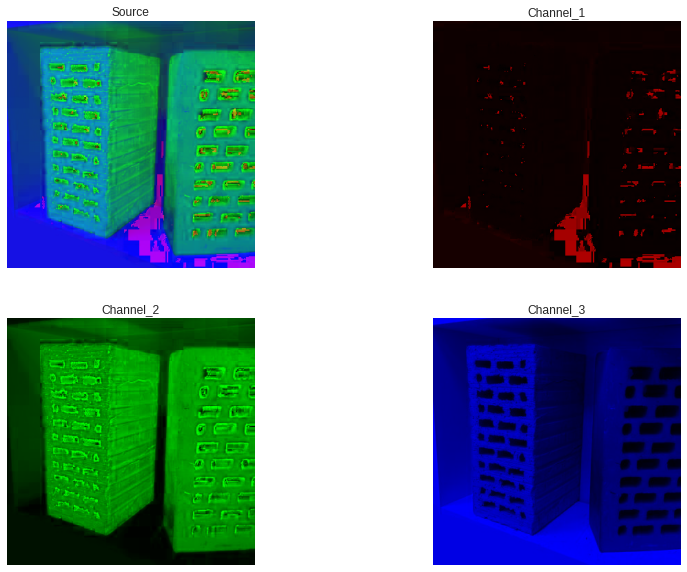

In [74]:
image_to_channels(convert(bgr_image, "HSV"))

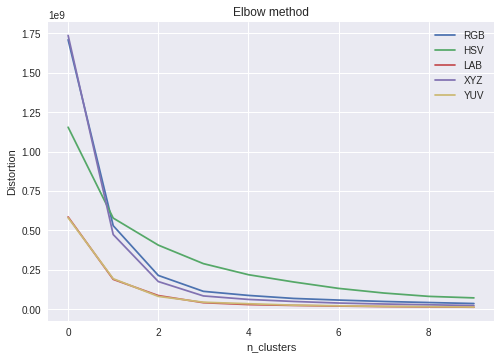

In [71]:
dis = elbow_research(bgr_image, verbose=True)

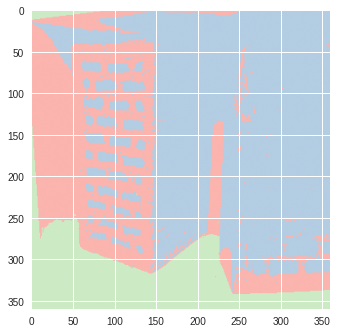

In [72]:
ret_arr = to_clust(convert(bgr_image, 'RGB'), 3)